In [32]:
from pathlib import Path
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [2]:
with open("20_278_946__2024-07-11.pickle", "rb") as graph_file:
    G = pickle.load(graph_file)


In [3]:
# 1. Basic Graph Information
print("Basic Graph Information")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Basic Graph Information
Number of nodes: 483039
Number of edges: 1190525



Degree Distribution
Average degree: 4.929312125936001


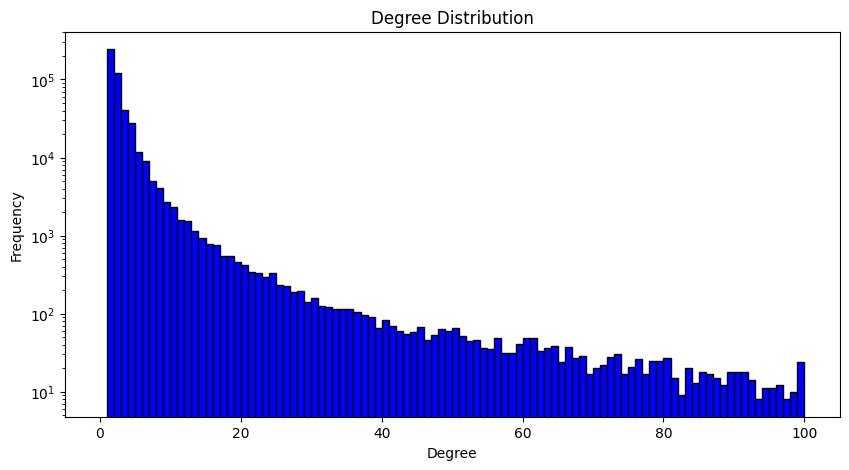

In [4]:
# 2. Degree distribution
degrees = dict(G.degree()).values()
print("\nDegree Distribution")
print(f"Average degree: {np.mean(list(degrees))}")

# Plot degree distribution
plt.figure(figsize=(10, 5))
plt.hist(degrees, bins=100, color='blue', edgecolor='black', range=(0, 100))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.yscale("log")

plt.show()

In [6]:
for cycle in tqdm(nx.chordless_cycles(G), desc="Cycle iteration"):
    pass

Cycle iteration: 926it [00:03, 292.41it/s] 


KeyboardInterrupt: 

In [8]:
for length_bound in range(2, 9):
    for cycle in tqdm(nx.chordless_cycles(G, length_bound=length_bound), desc=f"Cycle iteration {length_bound=}"):
        pass

Cycle iteration length_bound=2: 6202it [00:06, 906.01it/s] 
Cycle iteration length_bound=3: 7226it [05:10, 23.30it/s]  
Cycle iteration length_bound=4: 16538it [05:19, 51.81it/s] 
Cycle iteration length_bound=5: 21324it [05:46, 61.50it/s] 
Cycle iteration length_bound=6: 73303it [09:38, 126.67it/s] 
Cycle iteration length_bound=7: 195898it [22:19, 146.25it/s] 
Cycle iteration length_bound=8: 3582162it [3:59:25, 249.36it/s]  
Cycle iteration length_bound=9: 6787100it [16:22:29, 115.13it/s]  


KeyboardInterrupt: 

In [51]:
logs = """
Cycle iteration length_bound=2: 6202it [00:06, 906.01it/s] 
Cycle iteration length_bound=3: 7226it [05:10, 23.30it/s]  
Cycle iteration length_bound=4: 16538it [05:19, 51.81it/s] 
Cycle iteration length_bound=5: 21324it [05:46, 61.50it/s] 
Cycle iteration length_bound=6: 73303it [09:38, 126.67it/s] 
Cycle iteration length_bound=7: 195898it [22:19, 146.25it/s] 
Cycle iteration length_bound=8: 3582162it [3:59:25, 249.36it/s]  
"""
# Cycle iteration length_bound=9: 6787100it [16:22:29, 115.13it/s] # unfinished



In [52]:
import pandas as pd
# Extracting the relevant data
data = []
for line in logs.strip().split('\n'):
    parts = line.split()
    # print(parts)
    length_bound, it, time, rate = parts[2:]
    log_row = {
        "length_bound": length_bound[-2], "it": it[:-2], "time": time[1:-1], "rate": rate[:-5]}
    data.append(log_row)

logs_df = pd.DataFrame(data)
#     print()
#     length_bound = int(parts[3].split('=')[1].replace(':', ''))
#     it = int(parts[4].replace('it', ''))
#     time = parts[5].strip('[]').replace(',', '')
#     rate = float(parts[-1].replace('it/s', ''))
#     
#     data.append([length_bound, it, time, rate])
# 
# # Creating a DataFrame
# df = pd.DataFrame(data, columns=['length_bound', 'it', 'time', 'rate'])

In [53]:
import numpy as np

In [54]:
logs_df.to_csv("example_graph.networkx.chordless_cycles.csv", index=False)
logs_df = pd.read_csv("example_graph.networkx.chordless_cycles.csv")
logs_df['time'] = logs_df['time'].apply(lambda x: '00:' + x if x.count(':') == 1 else x)
logs_df['time'] = pd.to_timedelta(logs_df['time'])


In [55]:
logs_df['time_seconds'] = logs_df['time'].dt.total_seconds()
logs_df['time_minutes'] = logs_df['time_seconds'] / 60

In [56]:
logs_df

,length_bound,it,time,rate,time_seconds,time_minutes
0,2,6202,0 days 00:00:06,906.01,6.0,0.100000
1,3,7226,0 days 00:05:10,23.30,310.0,5.166667
2,4,16538,0 days 00:05:19,51.81,319.0,5.316667
3,5,21324,0 days 00:05:46,61.50,346.0,5.766667
4,6,73303,0 days 00:09:38,126.67,578.0,9.633333
5,7,195898,0 days 00:22:19,146.25,1339.0,22.316667
6,8,3582162,0 days 03:59:25,249.36,14365.0,239.416667


In [57]:
import matplotlib.pyplot as plt

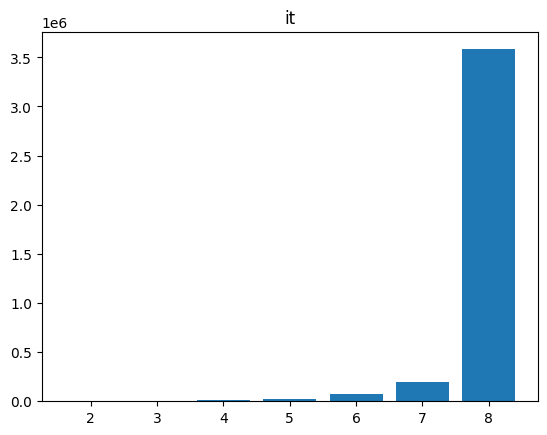

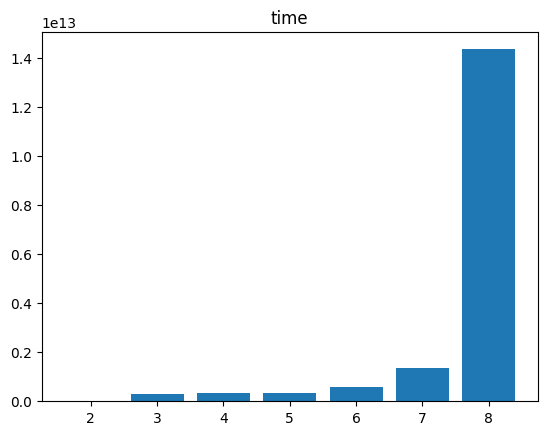

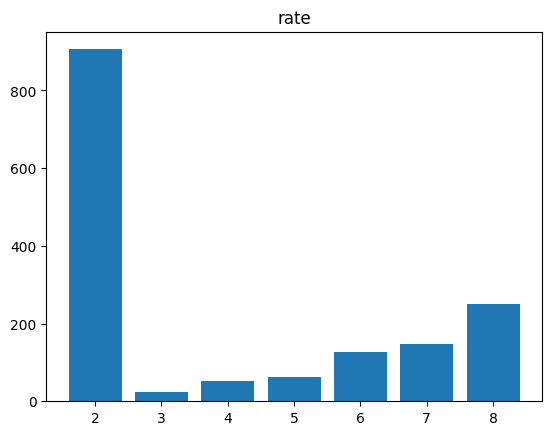

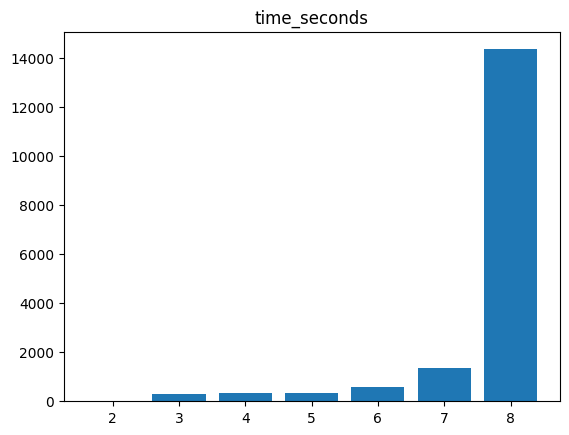

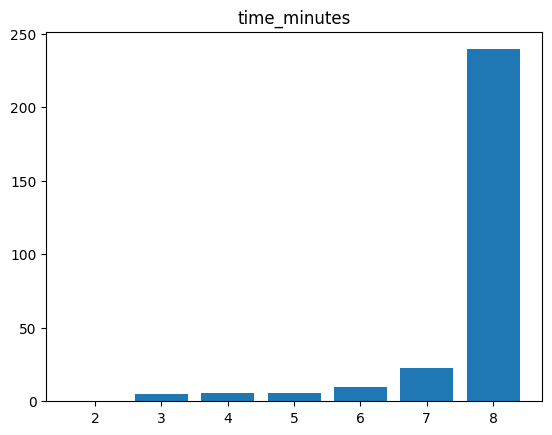

In [58]:
for col in logs_df.columns.values[1:]:
    fig, ax = plt.subplots()
    ax.bar(logs_df['length_bound'], logs_df[col])
    ax.set_title(col)
    plt.show()
    

In [31]:
# Dict comprehension to extract iteration and amount
iterations_dict = {int(line.split('=')[1].split(':')[0]): int(line.split()[4].replace('it', '')) 
                   for line in logs.strip().split('\n')}

print(iterations_dict)

ValueError: invalid literal for int() with base 10: '[00:06,'

In [47]:
logs_df.dtypes

length_bound              int64
it                        int64
time            timedelta64[ns]
rate                    float64
dtype: object